# Breast Cancer Data Exploratory Analysis

This dataset contains gene expression data from **TCGA** (The Cancer Genome Atlas) breast cancer patients.
Such raw counts were obtained using the reference genome **GRCH38**. The TCGA BRCA project contains 1097 gene expression profiles, while in our dataset there is only 1053 samples whose PAM50 sbutypes were already available.

The dataset is structured in the following way:

* Patients are on the rows, and 25150 protein coding genes are on the columns 
* The first column includes the TCGA ID of each patient
* The second column contains the PAM50 subtype of each patient, as publicly available on the metadata of the TCGA BRCA project 



In [1]:
%cd ../src

/Users/ivamilojkovic/Breast-Cancer-Analysis/src


In [9]:
import pandas as pd
import os, numpy as np
import seaborn as sns
import pickle
import matplotlib
import matplotlib.pyplot as plt

# Set parameters
plt.style.use('ggplot')
matplotlib.rcParams['font.size'] = 10
plt.rcParams["figure.figsize"] = (8, 6)

## Table Form Visualization

In [5]:
DATASET_PATH = "../data/brca/tcga_brca_raw_19036_1053samples.pkl"

with open(DATASET_PATH, 'rb') as file:
    dataset = pickle.load(file) 

dataset.head()

,tcga_id,expert_PAM50_subtype,sample_id,cancer_type,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,TCGA-3C-AAAU,LumA,1CBCD09F-2824-4E99-B657-F9565E9C9372,Breast Invasive Carcinoma,57898,67829,134,1697402,44314,1737,...,127715,285105,80532,272148,283023,84420,356353,1054121,557596,409660
1,TCGA-3C-AALI,Her2,58FB7633-DF82-406F-B4CB-277BE8DE003D,Breast Invasive Carcinoma,52146,65152,1361,1403901,36852,1636,...,225863,188283,24306,79305,219241,42889,112979,1041074,247545,88163
2,TCGA-3C-AALJ,LumB,F7B0D141-4D33-4A6E-8E05-08F7CF325459,Breast Invasive Carcinoma,52172,29356,510,989281,30378,282,...,36095,292971,9799,56118,48681,40923,63021,613785,110466,68745
3,TCGA-3C-AALK,LumA,22CB86F1-88B4-405A-B20F-A29694950367,Breast Invasive Carcinoma,50517,43436,287,2674831,69374,816,...,99575,169487,27979,99448,126525,48154,150177,1397623,196615,206477
4,TCGA-4H-AAAK,LumA,71F8A28D-077A-4A91-B56E-B035E4861E9C,Breast Invasive Carcinoma,66433,66229,192,2279532,56667,1603,...,99144,171558,23633,95460,118564,4928,188499,970767,199472,246179


In [6]:
print('Number of samples: ', dataset.shape[0])
print('Number of genes: ', dataset.shape[1] - 4) # first 4 columns dont represent genes
print('PAM50 sybtypes: ', dataset.expert_PAM50_subtype.unique())
print('Cancer types: ', dataset.cancer_type.unique())

Number of samples:  1053
Number of genes:  25150
PAM50 sybtypes:  ['LumA' 'Her2' 'LumB' 'Basal' 'Normal']
Cancer types:  ['Breast Invasive Carcinoma']


### Data Transformation

In [7]:
PAM50_genes = ["ACTR3B","ANLN","BAG1","BCL2","BIRC5","BLVRA","CCNB1","CCNE1","CDC20","CDC6",
               "CDH3","CENPF","CEP55","CXXC5","EGFR","ERBB2","ESR1","EXO1","FGFR4","FOXA1",
               "FOXC1","GPR160","GRB7","KIF2C","KRT14","KRT17","KRT5","MAPT","MDM2","MELK",
               "MIA","MKI67","MLPH","MMP11","MYBL2","MYC","NAT1","NDC80","NUF2","ORC6","PGR",
               "PHGDH","PTTG1","RRM2","SFRP1","SLC39A6", "TMEM45B","TYMS","UBE2C","UBE2T"] 

dataset_50_genes = dataset[['tcga_id'] + PAM50_genes]
dataset_50_genes.head()

,tcga_id,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PGR,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T
0,TCGA-3C-AAAU,94152,250598,585412,727675,195086,266078,381101,49295,173619,...,666113,220856,105726,421195,135352,26256062,2097,174686,170530,96950
1,TCGA-3C-AALI,28388,304389,146373,53310,298698,371792,355741,44327,119754,...,5177,142523,97591,589410,18195,309936,154588,150868,264478,190976
2,TCGA-3C-AALJ,16458,72685,220744,305214,141118,252437,205070,21403,98241,...,54607,12779,84642,144272,7382,1737574,1030,87952,142581,85289
3,TCGA-3C-AALK,32375,163746,439728,583393,276273,341642,202065,12057,126815,...,545985,170774,70570,218555,294189,4590121,133666,194704,129742,93120
4,TCGA-4H-AAAK,51869,90249,545458,406166,119423,163712,153078,14033,90401,...,1038968,150688,55900,89370,356841,894448,94755,181514,80772,48652


In [8]:
# Transform with log2
gene_50_values = dataset_50_genes.drop(columns='tcga_id', inplace=False).values
gene_50_columns = dataset_50_genes.drop(columns='tcga_id', inplace=False).columns

expression_values_log = np.log2(gene_50_values)
df_expression_values_log = pd.DataFrame(expression_values_log, columns=gene_50_columns)

# Check if there are NaN values
df_expression_values_log.isnull().values.any()

False

In [10]:
df_dataset_transform = pd.concat([dataset_50_genes.tcga_id, df_expression_values_log], axis=1)
df_dataset_transform.rename(columns={'tcga_id':'SAMPLE.ID'}, inplace=True)
df_dataset_transform.head()

,SAMPLE.ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,PGR,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T
0,TCGA-3C-AAAU,16.522704,17.935015,19.159093,19.472935,17.573751,18.021490,18.539814,15.589154,17.405565,...,19.345407,17.752747,16.689971,18.684129,17.046357,24.646147,11.034111,17.414404,17.379666,16.564953
1,TCGA-3C-AALI,14.792994,18.215557,17.159290,15.702119,18.188328,18.504136,18.440468,15.435898,16.869714,...,12.337901,17.120835,16.574460,19.168912,14.151254,18.241611,17.238069,17.202927,18.012788,17.543032
2,TCGA-3C-AALJ,14.006501,16.149370,17.752015,18.219462,17.106542,17.945564,17.645757,14.385525,16.584038,...,15.736798,13.641487,16.369086,17.138432,12.849796,20.728643,10.008429,16.424429,17.121422,16.380072
3,TCGA-3C-AALK,14.982593,17.321100,18.746252,19.154109,18.075735,18.382126,17.624460,13.557583,16.952366,...,19.058502,17.381729,16.106767,17.737637,18.166384,22.130101,17.028273,17.570923,16.985286,16.506803
4,TCGA-4H-AAAK,15.662585,16.461623,19.057109,18.631710,16.865721,17.320801,17.223907,13.776536,16.464051,...,19.986720,17.201205,15.770561,16.447503,18.444922,19.770638,16.531914,17.469721,16.301568,15.570211


In [11]:
with open('../dataset_log_transform.pkl', 'wb') as file:
    pickle.dump(df_dataset_transform, file)

df_dataset_transform.to_csv('../dataset_log_transform.csv', sep=',')

In [12]:
df_multilabel = pd.read_excel(r'../data/Classified_samples_info_AWCA_gen_Reference.xlsx', engine='openpyxl')
df_multilabel

,Unnamed: 0,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5T-A9QA,TCGA-A1-A0SG,TCGA-A1-A0SO,...,TCGA-AR-A2LH,TCGA-AR-A2LQ,TCGA-B6-A0RQ,TCGA-BH-A1FU,TCGA-BH-A28O,TCGA-BH-A42U,TCGA-E2-A108,TCGA-EW-A1P7,TCGA-EW-A1PG,TCGA-GM-A2DD
0,Subtype-from Parker centroids,LumA,Her2,LumB,LumA,LumA,LumA,LumB,LumA,Basal,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
1,MaxCorr,0.37344537815126,0.647827130852341,0.35750300120048,0.666746698679472,0.556302521008403,0.731572629051621,0.419735894357743,0.709867947178872,0.58953181272509,...,0.576182472989196,0.739255702280912,0.740024009603842,0.246386554621849,0.79563025210084,0.758655462184874,0.485234093637455,0.558319327731092,0.717935174069628,0.265210084033613
2,Expert subtype,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ER status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HER status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Basal,-0.439711884753902,-0.191356542617047,-0.409171668667467,-0.419543817527011,-0.275390156062425,-0.390252100840336,-0.4831212484994,-0.521824729891957,0.58953181272509,...,0.0244417767106843,-0.130276110444178,-0.219783913565426,0.105018007202881,-0.137575030012005,-0.200960384153661,0.0642016806722689,0.26578631452581,-0.216038415366146,0.158031212484994
6,Her2,-0.256278511404562,0.647827130852341,-0.0153181272509004,-0.316494597839136,-0.328403361344538,-0.405810324129652,0.167827130852341,-0.267130852340936,0.159855942376951,...,-0.33608643457383,-0.458823529411765,-0.536134453781513,0.165522208883553,-0.548523409363746,-0.493301320528211,-0.562160864345738,-0.385834333733493,-0.513085234093637,0.114333733493397
7,LumA,0.37344537815126,-0.112797118847539,0.144969987995198,0.666746698679472,0.556302521008403,0.731572629051621,0.284801920768307,0.709867947178872,-0.687298919567827,...,0.335798319327731,0.613637454981993,0.70343337334934,-0.00148859543817527,0.648403361344538,0.645138055222089,0.272509003601441,0.189435774309724,0.690180072028811,-0.0459543817527011
8,LumB,0.179927971188475,0.247731092436975,0.35750300120048,-0.307466986794718,-0.437599039615846,-0.350204081632653,0.419735894357743,-0.243697478991597,-0.0138775510204082,...,-0.48187274909964,-0.54890756302521,-0.533925570228091,-0.422521008403361,-0.601728691476591,-0.556398559423769,-0.465546218487395,-0.642064825930372,-0.487058823529412,-0.356542617046819
9,Normal,-0.0735174069627851,-0.322064825930372,-0.276062424969988,0.458535414165666,0.503961584633854,0.51750300120048,-0.112605042016807,0.391212484993998,-0.187611044417767,...,0.576182472989196,0.739255702280912,0.740024009603842,0.246386554621849,0.79563025210084,0.758655462184874,0.485234093637455,0.558319327731092,0.717935174069628,0.265210084033613


In [13]:
df_multilabel_1 = df_multilabel.iloc[:2, :].transpose()
df_multilabel_2 = df_multilabel.iloc[-5:, :].transpose()
df_multilabel_col_names = df_multilabel_1.iloc[0, :]
df_multilabel_1.drop(index='Unnamed: 0', inplace=True)
df_multilabel_1


,0,1
TCGA-3C-AAAU,LumA,0.37344537815126
TCGA-3C-AALI,Her2,0.647827130852341
TCGA-3C-AALJ,LumB,0.35750300120048
TCGA-3C-AALK,LumA,0.666746698679472
TCGA-4H-AAAK,LumA,0.556302521008403
...,...,...
TCGA-BH-A42U,Normal,0.758655462184874
TCGA-E2-A108,Normal,0.485234093637455
TCGA-EW-A1P7,Normal,0.558319327731092
TCGA-EW-A1PG,Normal,0.717935174069628


In [14]:
df_multilabel_col_names_2 = df_multilabel_2.iloc[0, :]
df_multilabel_2.drop(index='Unnamed: 0', inplace=True)
df_multilabel_2

,5,6,7,8,9
TCGA-3C-AAAU,-0.439711884753902,-0.256278511404562,0.37344537815126,0.179927971188475,-0.0735174069627851
TCGA-3C-AALI,-0.191356542617047,0.647827130852341,-0.112797118847539,0.247731092436975,-0.322064825930372
TCGA-3C-AALJ,-0.409171668667467,-0.0153181272509004,0.144969987995198,0.35750300120048,-0.276062424969988
TCGA-3C-AALK,-0.419543817527011,-0.316494597839136,0.666746698679472,-0.307466986794718,0.458535414165666
TCGA-4H-AAAK,-0.275390156062425,-0.328403361344538,0.556302521008403,-0.437599039615846,0.503961584633854
...,...,...,...,...,...
TCGA-BH-A42U,-0.200960384153661,-0.493301320528211,0.645138055222089,-0.556398559423769,0.758655462184874
TCGA-E2-A108,0.0642016806722689,-0.562160864345738,0.272509003601441,-0.465546218487395,0.485234093637455
TCGA-EW-A1P7,0.26578631452581,-0.385834333733493,0.189435774309724,-0.642064825930372,0.558319327731092
TCGA-EW-A1PG,-0.216038415366146,-0.513085234093637,0.690180072028811,-0.487058823529412,0.717935174069628


In [15]:
df_multilabel_1.columns = list(df_multilabel_col_names.values)
df_multilabel_2.columns = list(df_multilabel_col_names_2.values)

In [16]:
dataset.index = list(dataset.tcga_id.values)
dataset.drop(columns='tcga_id').head()

,expert_PAM50_subtype,sample_id,cancer_type,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-3C-AAAU,LumA,1CBCD09F-2824-4E99-B657-F9565E9C9372,Breast Invasive Carcinoma,57898,67829,134,1697402,44314,1737,568,...,127715,285105,80532,272148,283023,84420,356353,1054121,557596,409660
TCGA-3C-AALI,Her2,58FB7633-DF82-406F-B4CB-277BE8DE003D,Breast Invasive Carcinoma,52146,65152,1361,1403901,36852,1636,1357,...,225863,188283,24306,79305,219241,42889,112979,1041074,247545,88163
TCGA-3C-AALJ,LumB,F7B0D141-4D33-4A6E-8E05-08F7CF325459,Breast Invasive Carcinoma,52172,29356,510,989281,30378,282,1974,...,36095,292971,9799,56118,48681,40923,63021,613785,110466,68745
TCGA-3C-AALK,LumA,22CB86F1-88B4-405A-B20F-A29694950367,Breast Invasive Carcinoma,50517,43436,287,2674831,69374,816,2084,...,99575,169487,27979,99448,126525,48154,150177,1397623,196615,206477
TCGA-4H-AAAK,LumA,71F8A28D-077A-4A91-B56E-B035E4861E9C,Breast Invasive Carcinoma,66433,66229,192,2279532,56667,1603,2425,...,99144,171558,23633,95460,118564,4928,188499,970767,199472,246179


In [17]:
total_df = df_multilabel_1.join(df_multilabel_2)
multilabel_dataset  = dataset.join(total_df).reset_index(drop=True)

In [18]:
multilabel_dataset.drop(columns=['sample_id','cancer_type'], inplace=True)
multilabel_dataset

,tcga_id,expert_PAM50_subtype,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,ZYX,ZZEF1,ZZZ3,Subtype-from Parker centroids,MaxCorr,Basal,Her2,LumA,LumB,Normal
0,TCGA-3C-AAAU,LumA,57898,67829,134,1697402,44314,1737,568,0,...,1054121,557596,409660,LumA,0.37344537815126,-0.439711884753902,-0.256278511404562,0.37344537815126,0.179927971188475,-0.0735174069627851
1,TCGA-3C-AALI,Her2,52146,65152,1361,1403901,36852,1636,1357,41,...,1041074,247545,88163,Her2,0.647827130852341,-0.191356542617047,0.647827130852341,-0.112797118847539,0.247731092436975,-0.322064825930372
2,TCGA-3C-AALJ,LumB,52172,29356,510,989281,30378,282,1974,119,...,613785,110466,68745,LumB,0.35750300120048,-0.409171668667467,-0.0153181272509004,0.144969987995198,0.35750300120048,-0.276062424969988
3,TCGA-3C-AALK,LumA,50517,43436,287,2674831,69374,816,2084,172,...,1397623,196615,206477,LumA,0.666746698679472,-0.419543817527011,-0.316494597839136,0.666746698679472,-0.307466986794718,0.458535414165666
4,TCGA-4H-AAAK,LumA,66433,66229,192,2279532,56667,1603,2425,246,...,970767,199472,246179,LumA,0.556302521008403,-0.275390156062425,-0.328403361344538,0.556302521008403,-0.437599039615846,0.503961584633854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,TCGA-BH-A42U,Normal,141068,86135,192,9999765,628915,1283,16684,51,...,3618650,332745,219018,Normal,0.758655462184874,-0.200960384153661,-0.493301320528211,0.645138055222089,-0.556398559423769,0.758655462184874
1049,TCGA-E2-A108,Normal,36667,39082,223,9380667,176967,4530,9219,165,...,1397020,374210,221319,Normal,0.485234093637455,0.0642016806722689,-0.562160864345738,0.272509003601441,-0.465546218487395,0.485234093637455
1050,TCGA-EW-A1P7,Normal,32150,37899,71,6707683,139652,556063,12178,70,...,1472248,408560,329125,Normal,0.558319327731092,0.26578631452581,-0.385834333733493,0.189435774309724,-0.642064825930372,0.558319327731092
1051,TCGA-EW-A1PG,Normal,17379,29996,69,5658389,94026,1061,4606,23,...,1248092,258831,301531,Normal,0.717935174069628,-0.216038415366146,-0.513085234093637,0.690180072028811,-0.487058823529412,0.717935174069628


In [19]:
# Convert last 5 columns to float
multilabel_dataset['LumA'] = multilabel_dataset['LumA'].astype(float)
multilabel_dataset['LumB'] = multilabel_dataset['LumB'].astype(float)
multilabel_dataset['Basal'] = multilabel_dataset['Basal'].astype(float)
multilabel_dataset['Her2'] = multilabel_dataset['Her2'].astype(float)
multilabel_dataset['Normal'] = multilabel_dataset['Normal'].astype(float)
multilabel_dataset['MaxCorr'] = multilabel_dataset['MaxCorr'].astype(float)

In [20]:
# Check if labels before and now are the same
sum(multilabel_dataset.expert_PAM50_subtype != multilabel_dataset['Subtype-from Parker centroids'])

97

#### Let's check a bit these 97 samples...

In [21]:
# not_same = multilabel_dataset.expert_PAM50_subtype != multilabel_dataset['Subtype-from Parker centroids']
# not_same_label_data = multilabel_dataset.loc[not_same, :]

orig_case_labels = multilabel_dataset['expert_PAM50_subtype']
pam50_case_labels = multilabel_dataset.iloc[:,-7:]
pam50_case_labels.head()

,Subtype-from Parker centroids,MaxCorr,Basal,Her2,LumA,LumB,Normal
0,LumA,0.373445,-0.439712,-0.256279,0.373445,0.179928,-0.073517
1,Her2,0.647827,-0.191357,0.647827,-0.112797,0.247731,-0.322065
2,LumB,0.357503,-0.409172,-0.015318,0.144970,0.357503,-0.276062
3,LumA,0.666747,-0.419544,-0.316495,0.666747,-0.307467,0.458535
4,LumA,0.556303,-0.275390,-0.328403,0.556303,-0.437599,0.503962


In [22]:
def orig_class_vs_pam50(orig_case_labels, pam50_case_labels, label):

    # Select samples with a given label (original  case)
    orig_label_samples = orig_case_labels[orig_case_labels==label]
    idx = orig_label_samples.index
    pam50_labels = pam50_case_labels.loc[idx, :]
    print(pam50_labels['Subtype-from Parker centroids'].value_counts())

    # Find and print differences
    pam50_diff = pam50_labels[pam50_labels['Subtype-from Parker centroids']!=label]
    return pam50_diff.iloc[:,-6:].head()

orig_class_vs_pam50(orig_case_labels, pam50_case_labels, label='LumA')

LumA      517
Normal     28
LumB        1
Name: Subtype-from Parker centroids, dtype: int64


,MaxCorr,Basal,Her2,LumA,LumB,Normal
80,0.258295,-0.150636,-0.400528,0.208259,-0.114334,0.258295
93,0.351357,-0.469772,-0.189148,0.316110,0.351357,-0.143625
175,0.689988,-0.259544,-0.500312,0.681537,-0.531525,0.689988
185,0.129412,-0.139304,-0.074574,0.062665,-0.079856,0.129412
189,0.543914,-0.201441,-0.400624,0.529892,-0.306026,0.543914


Text(0.5, 36.72222222222221, 'PAM50 label assigned')

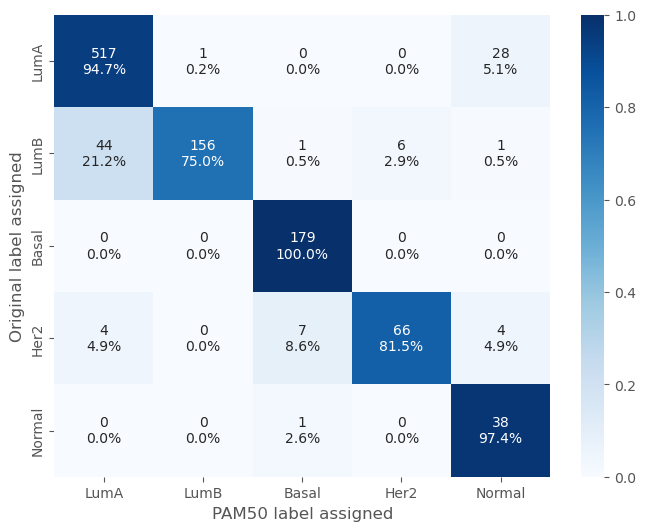

In [23]:
import seaborn as sns

# Show differences with a heatmap - [LumA, LumB, Basal, Her2, Normal]
values_ = [[517, 1, 0, 0, 28], # for true LumA values these are the class counts in the new one
            [44, 156, 1, 6, 1],
            [0, 0, 179, 0, 0],
            [4, 0, 7, 66, 4],
            [0, 0, 1, 0, 38]]

new_values_ = []
for list_val in values_:
    new_values_.append([i/sum(list_val) for i in list_val])

classes = ['LumA', 'LumB', 'Basal', 'Her2', 'Normal']
group_counts = np.array(values_).flatten()
group_percentages = ['{0:.1%}'.format(val) for val in np.array(new_values_).flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts, group_percentages)]

labels = np.asarray(labels).reshape(5,5)

sns.heatmap(new_values_, annot=labels, 
            cmap='Blues', fmt='',
            xticklabels=classes, 
            yticklabels=classes)

plt.ylabel('Original label assigned')
plt.xlabel('PAM50 label assigned')

In [24]:
not_same = multilabel_dataset.expert_PAM50_subtype != multilabel_dataset['Subtype-from Parker centroids']
df_not_same = multilabel_dataset[not_same]
df_not_same.head()


,tcga_id,expert_PAM50_subtype,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,ZYX,ZZEF1,ZZZ3,Subtype-from Parker centroids,MaxCorr,Basal,Her2,LumA,LumB,Normal
17,TCGA-A7-A6VX,LumB,49717,92093,423,1522999,33117,2418,892,400,...,777633,332224,327255,LumA,0.286146,-0.355966,-0.001681,0.286146,0.222665,-0.059400
30,TCGA-AC-A5EH,Her2,70011,44281,271,1868961,47360,3386,1014,0,...,2773402,264480,187918,LumA,0.202113,-0.216615,0.120000,0.202113,0.064202,0.026651
80,TCGA-AO-A0JC,LumA,37451,43963,198,2983511,69459,20646,11324,137,...,1035571,511408,237772,Normal,0.258295,-0.150636,-0.400528,0.208259,-0.114334,0.258295
81,TCGA-AO-A0JD,LumB,16510,25303,170,1630893,24591,32799,1056,271,...,344127,297940,615781,Basal,0.090996,0.090996,-0.363842,-0.004370,0.025018,-0.011669
93,TCGA-AO-A12B,LumA,58659,55595,49,1369572,45843,1040,828,7,...,677809,224901,168201,LumB,0.351357,-0.469772,-0.189148,0.316110,0.351357,-0.143625


,tcga_id,expert_PAM50_subtype,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,ZYX,ZZEF1,ZZZ3,Subtype-from Parker centroids,MaxCorr,Basal,Her2,LumA,LumB,Normal
93,TCGA-AO-A12B,LumA,58659,55595,49,1369572,45843,1040,828,7,...,677809,224901,168201,LumB,0.351357,-0.469772,-0.189148,0.31611,0.351357,-0.143625


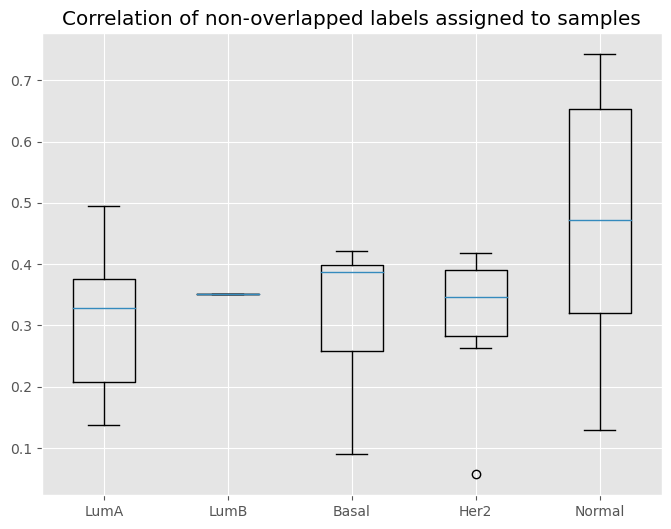

In [25]:
df_not_same[['Subtype-from Parker centroids', 'MaxCorr']]

df_basal, df_her2, df_luma, df_lumb, df_normal = \
    [x for _, x in df_not_same.groupby(df_not_same['Subtype-from Parker centroids'])]

list_data = [df_luma['LumA'].values, df_lumb['LumB'].values,
             df_basal['Basal'], df_her2['Her2'], df_normal['Normal']]
plt.boxplot(list_data)
plt.xticks([1, 2, 3, 4, 5], ['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
plt.title('Correlation of non-overlapped labels assigned to samples')

df_lumb

In [26]:
with open('../dataset_multilabel.pkl', 'wb') as f:
    pickle.dump(multilabel_dataset, f)

### Multilable dataset exploration

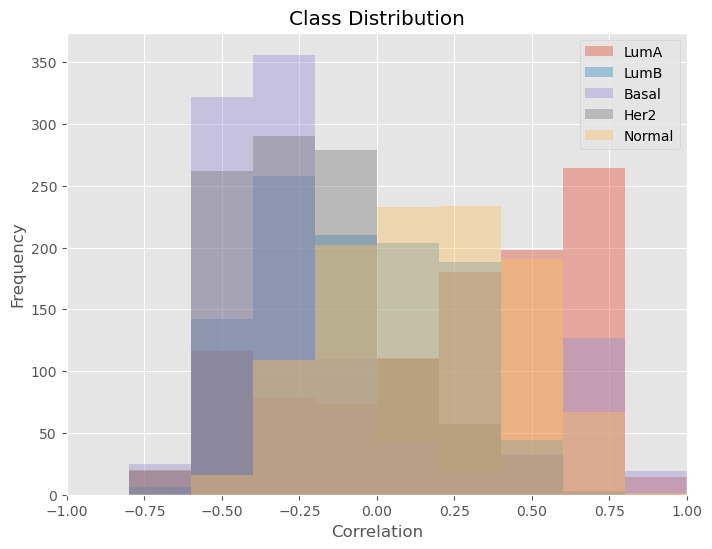

In [46]:
# Distributions 

multilabel_dataset['LumA'].plot(kind='hist', alpha=0.4, range=(-1, 1))
multilabel_dataset['LumB'].plot(kind='hist',  alpha=0.4, range=(-1, 1))
multilabel_dataset['Basal'].plot(kind='hist',  alpha=0.4, range=(-1, 1))
multilabel_dataset['Her2'].plot(kind='hist',  alpha=0.4, range=(-1, 1))
multilabel_dataset['Normal'].plot(kind='hist',  alpha=0.4, range=(-1, 1))

plt.legend(['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
plt.title('Class Distribution')
plt.xlabel('Correlation')

# Set the range of x-axis and y-axis
plt.xlim(-1, 1)

# Get the colors used in the plot
colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']

Text(0.5, 0, 'Correlation')

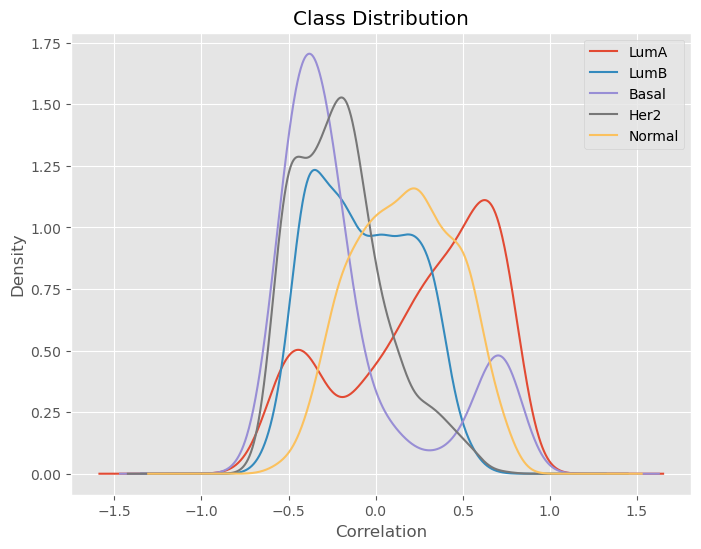

In [26]:
# Distributions 

multilabel_dataset['LumA'].plot(kind='kde')
multilabel_dataset['LumB'].plot(kind='kde')
multilabel_dataset['Basal'].plot(kind='kde')
multilabel_dataset['Her2'].plot(kind='kde')
multilabel_dataset['Normal'].plot(kind='kde')

plt.legend(['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
plt.title('Class Distribution')
plt.xlabel('Correlation')


#### Negative correlation exclution

Text(0.5, 0, 'Correlation')

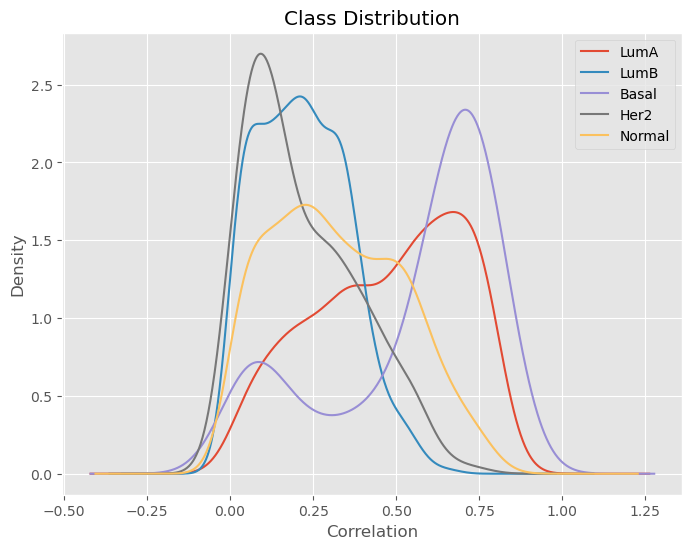

In [27]:
# Interpretation of negative correlations as having no correlation

multilabel_dataset['LumA'][multilabel_dataset['LumA'] >= 0].plot(kind='kde')
multilabel_dataset['LumB'][multilabel_dataset['LumB'] >= 0].plot(kind='kde')
multilabel_dataset['Basal'][multilabel_dataset['Basal'] >= 0].plot(kind='kde')
multilabel_dataset['Her2'][multilabel_dataset['Her2'] >= 0].plot(kind='kde')
multilabel_dataset['Normal'][multilabel_dataset['Normal'] >= 0].plot(kind='kde')

plt.legend(['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
plt.title('Class Distribution')
plt.xlabel('Correlation')

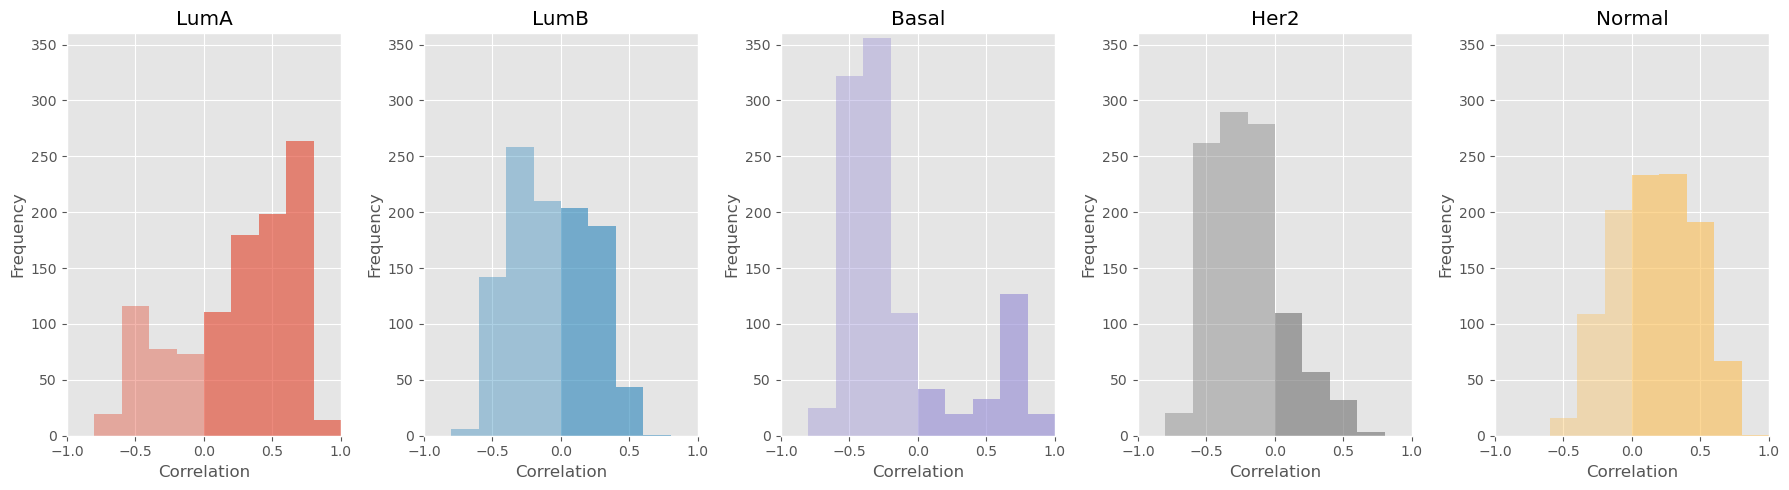

In [48]:

# Define the first five colors from the "tab10" colormap
# colors = plt.get_cmap('tab10').colors[:5]

fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(18, 5))
axes = axes.flatten()
for i, label in enumerate(['LumA', 'LumB', 'Basal', 'Her2', 'Normal']):
    multilabel_dataset[label].plot(kind='hist', alpha=0.4, range=(-1, 1), ax=axes[i], color=colors[i])
    multilabel_dataset[label][multilabel_dataset[label] >= 0].plot(kind='hist', alpha=0.4, range=(-1, 1), ax=axes[i], color=colors[i])
    axes[i].set_title(label)
    axes[i].set_xlabel('Correlation')

    # Set the range of x-axis and y-axis
    axes[i].set_xlim(-1, 1)
    axes[i].set_ylim(0, 360)
plt.tight_layout()


Text(0.5, 1.0, 'Correlation values across different classes')

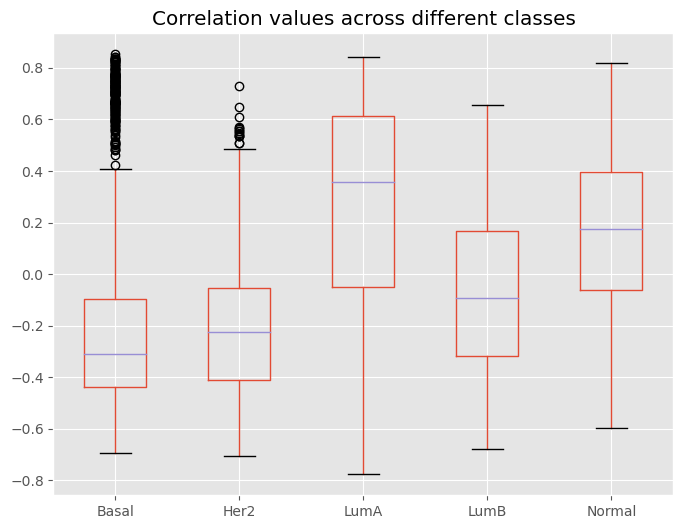

In [27]:
ax = plt.figure()
df = multilabel_dataset[df_multilabel_2.columns]
ax = df.boxplot()
plt.title('Correlation values across different classes')

In [28]:
df

,Basal,Her2,LumA,LumB,Normal
0,-0.439712,-0.256279,0.373445,0.179928,-0.073517
1,-0.191357,0.647827,-0.112797,0.247731,-0.322065
2,-0.409172,-0.015318,0.144970,0.357503,-0.276062
3,-0.419544,-0.316495,0.666747,-0.307467,0.458535
4,-0.275390,-0.328403,0.556303,-0.437599,0.503962
...,...,...,...,...,...
1048,-0.200960,-0.493301,0.645138,-0.556399,0.758655
1049,0.064202,-0.562161,0.272509,-0.465546,0.485234
1050,0.265786,-0.385834,0.189436,-0.642065,0.558319
1051,-0.216038,-0.513085,0.690180,-0.487059,0.717935


In [29]:
multilabel_dataset['LumA'][multilabel_dataset['LumA'] < 0] = 0
multilabel_dataset['LumB'][multilabel_dataset['LumB'] < 0] = 0
multilabel_dataset['Basal'][multilabel_dataset['Basal'] < 0] = 0
multilabel_dataset['Her2'][multilabel_dataset['Her2'] < 0] = 0
multilabel_dataset['Normal'][multilabel_dataset['Normal'] < 0] = 0

multilabel_dataset.head()

/var/folders/jg/5z3sdjp17lzf071k7dn02lxm0000gn/T/ipykernel_9678/3204120144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multilabel_dataset['LumA'][multilabel_dataset['LumA'] < 0] = 0
/var/folders/jg/5z3sdjp17lzf071k7dn02lxm0000gn/T/ipykernel_9678/3204120144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multilabel_dataset['LumB'][multilabel_dataset['LumB'] < 0] = 0
/var/folders/jg/5z3sdjp17lzf071k7dn02lxm0000gn/T/ipykernel_9678/3204120144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,tcga_id,expert_PAM50_subtype,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,ZYX,ZZEF1,ZZZ3,Subtype-from Parker centroids,MaxCorr,Basal,Her2,LumA,LumB,Normal
0,TCGA-3C-AAAU,LumA,57898,67829,134,1697402,44314,1737,568,0,...,1054121,557596,409660,LumA,0.373445,0.0,0.000000,0.373445,0.179928,0.000000
1,TCGA-3C-AALI,Her2,52146,65152,1361,1403901,36852,1636,1357,41,...,1041074,247545,88163,Her2,0.647827,0.0,0.647827,0.000000,0.247731,0.000000
2,TCGA-3C-AALJ,LumB,52172,29356,510,989281,30378,282,1974,119,...,613785,110466,68745,LumB,0.357503,0.0,0.000000,0.144970,0.357503,0.000000
3,TCGA-3C-AALK,LumA,50517,43436,287,2674831,69374,816,2084,172,...,1397623,196615,206477,LumA,0.666747,0.0,0.000000,0.666747,0.000000,0.458535
4,TCGA-4H-AAAK,LumA,66433,66229,192,2279532,56667,1603,2425,246,...,970767,199472,246179,LumA,0.556303,0.0,0.000000,0.556303,0.000000,0.503962


Text(0.5, 1.0, 'Specific class samples (with negative) correlation values')

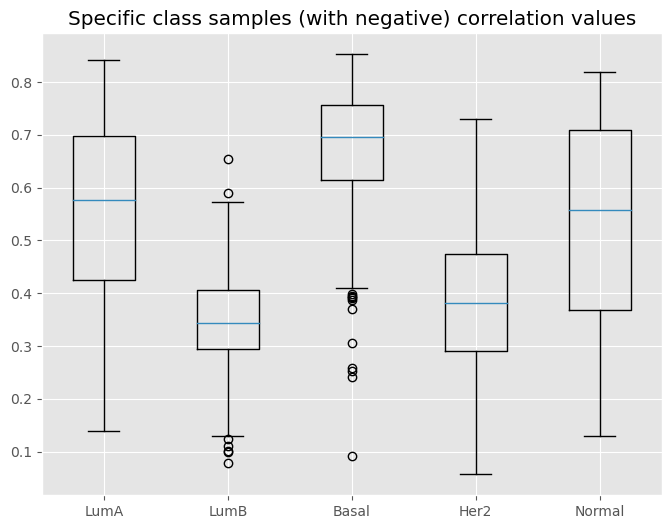

In [30]:
df_basal, df_her2, df_luma, df_lumb, df_normal = \
    [x for _, x in multilabel_dataset.groupby(multilabel_dataset['Subtype-from Parker centroids'])]

list_data = [df_luma['LumA'].values, df_lumb['LumB'].values,
             df_basal['Basal'], df_her2['Her2'], df_normal['Normal']]
plt.boxplot(list_data)
plt.xticks([1, 2, 3, 4, 5], ['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])

plt.title('Specific class samples (with negative) correlation values')

In [ ]:
from utils import create_mcut_nth_percentile_labels



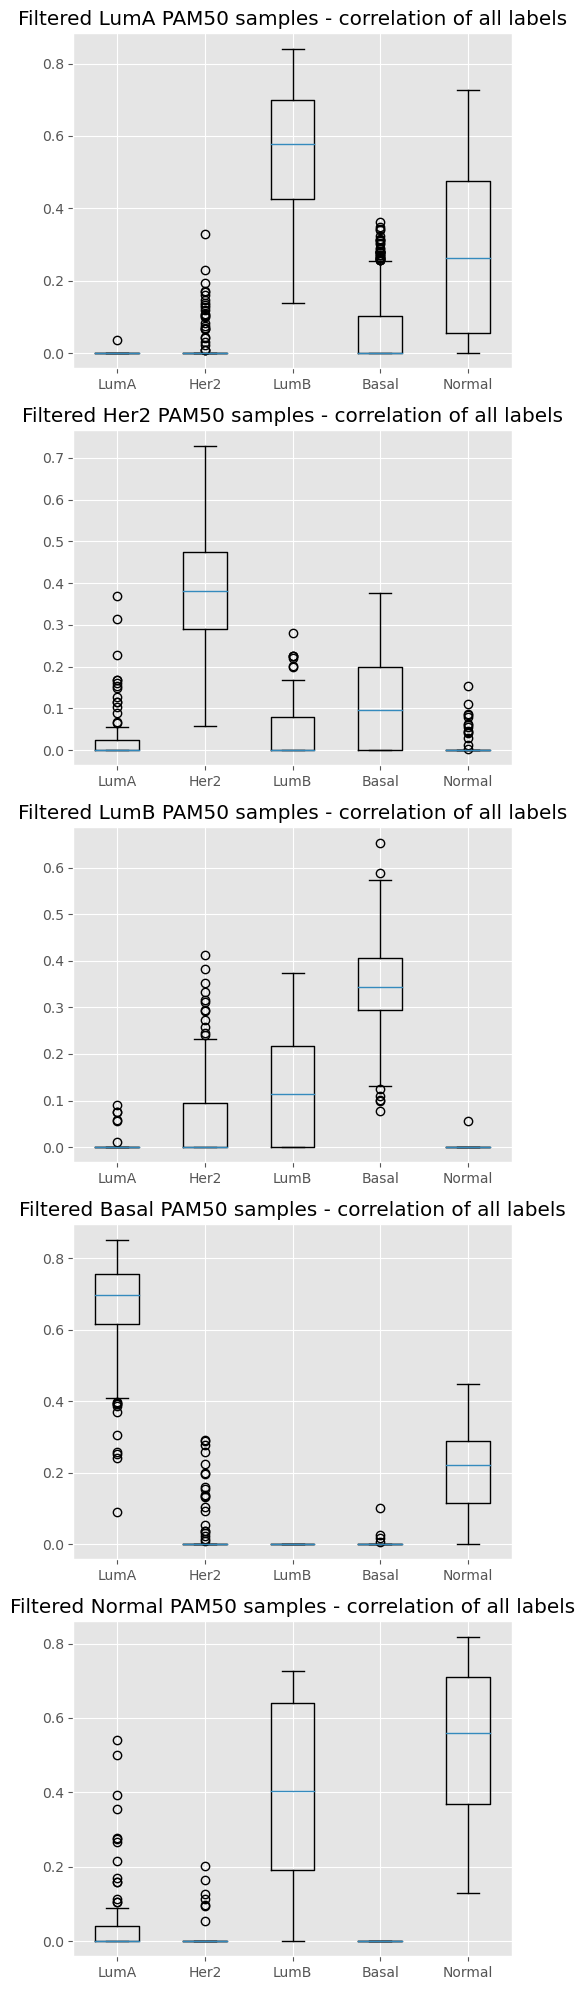

In [69]:
# By selectin one label (e.g. LumA) samples from the original dataset, and 
# plotting correlations for all 5 classes

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(5, 20))
pam50_labels = multilabel_dataset['Subtype-from Parker centroids'].unique()
for i, ax in enumerate(axs):
    pam50_label_idx = multilabel_dataset['Subtype-from Parker centroids']==pam50_labels[i]
    df = multilabel_dataset.iloc[:, -5:][pam50_label_idx]
    ax.boxplot(df)
    ax.set_title('Filtered ' + pam50_labels[i] + ' PAM50 samples - correlation of all labels')
    ax.set_xticklabels(pam50_labels)

plt.tight_layout()

### 5-th Percentile Threshold

In [ ]:
def find_high_corr(corr_matrix, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

high_corr_cols = find_high_corr(corr_matrix, threshold=0.8)
high_corr_cols

{'SEC61A1',
 'ZNF354C',
 'SPACA4',
 'GNG11',
 'MIR454',
 'SNORA80E',
 'ARNTL2-AS1',
 'HNRNPU',
 'IQCA1L',
 'MIR3689C',
 'SIGLEC7',
 'LOC101927138',
 'VLDLR-AS1',
 'NAE1',
 'EPPIN',
 'IST1',
 'MIR1302-6',
 'IKZF1',
 'SCGB1A1',
 'SNORD82',
 'FAM129C',
 'SLX1A',
 'MAX',
 'RNU4-2',
 'LINC01043',
 'MYO1G',
 'CLPX',
 'TRIM37',
 'OR3A2',
 'USP42',
 'LOC101928322',
 'RNU6-1',
 'CHMP2B',
 'PFDN5',
 'XCL2',
 'ATF6',
 'GBX2',
 'LOC101928837',
 'NSMCE4A',
 'RNASE11',
 'SMG1',
 'MTCP1',
 'LOC107161159',
 'PIK3CG',
 'FGG',
 'TFB2M',
 'DCN',
 'C11orf65',
 'SEPT1',
 'CSN1S2AP',
 'GOLGA6L4',
 'ST18',
 'CDH6',
 'PKD1P6-NPIPP1',
 'SPIC',
 'RNF215',
 'HMGXB4',
 'USP37',
 'MIR6134',
 'PSMB8',
 'SNORA53',
 'UBE2A',
 'NSD1',
 'PRDX1',
 'FAM26E',
 'HLA-G',
 'WWTR1-AS1',
 'SNORD109A',
 'IL1R2',
 'MARVELD2',
 'FCRLA',
 'LOC100133286',
 'HTR7P1',
 'ST8SIA3',
 'MIR4509-3',
 'CARM1',
 'HCCS',
 'LRRC37A',
 'SMG1P6',
 'TUBA1C',
 'SLAMF8',
 'WLS',
 'APOBEC3B-AS1',
 'CDCA8',
 'ITSN2',
 'ELK4',
 'ZNF707',
 'MAMDC2-AS1'

In [9]:
import pickle

# Save features that should be removed
with open('high_corr_feat.pkl', 'wb') as file:
    pickle.dump(high_corr_cols, file)

In [6]:
print('Number of genes in the dataset:', genes_data.shape[1])
print('Number of higly correlated genes:',len(high_corr_cols))

# Remove the higly correlated genes
genes_data.drop(columns=high_corr_cols, inplace=True)

print('Number of genes in the dataset after filtering:', genes_data.shape[1])

Number of genes in the dataset: 25150


NameError: name 'high_corr_cols' is not defined

# Wrapper methods

1. Step Forward Selection
2. Backward Elimination
3. Recursive Feature Selection

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# But firstly let's split and normalize the dataset
X = dataset.drop(columns=['expert_PAM50_subtype', 'tcga_id', 'sample_id', 'cancer_type'], inplace=False)
y = dataset.expert_PAM50_subtype

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, 
                                                    shuffle=True, stratify=y)  

def log_transform(x):
    print(x)
    return np.log(x + 1)

scaler = FunctionTransformer(log_transform)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

LB = LabelEncoder()
y_train = LB.fit_transform(y_train)

X_train_scaled

       A1BG  A1BG-AS1  A1CF       A2M  A2M-AS1    A2ML1  A2MP1  A3GALT2  \
957   39293     82136    21   2560567    43096     4861   1297        4   
827  313741     87683     0   1696843   181682      384    534        0   
119   12409     16848   197   1529876    31250   814691   3337      478   
626   20390     52302   623  15230218   320222   572832  13433        0   
909   45834     47305   200   6119844    97869    15433   3092       52   
..      ...       ...   ...       ...      ...      ...    ...      ...   
428   73162     75663    72   3651985    93411     1502    867      123   
238   26290     58902   457   3908891   125975  4583468   5110      284   
637   34616     52300   671   2321846    39606     1203   1837       74   
209  124547     56645   356   3227134   121238     3563   3471        8   
597   18545     42675   100   1770562    31096      777   1195       24   

     A4GALT  A4GNT  ...  ZWILCH   ZWINT   ZXDA    ZXDB    ZXDC  ZYG11A  \
957   70149    100  ...  

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
957,10.578827,11.316144,3.091042,14.755740,10.671209,8.489205,7.168580,1.609438,11.158391,4.615121,...,11.876012,12.120618,11.227534,12.980076,11.993226,10.010367,12.868616,13.669048,13.214673,12.810266
827,12.656326,11.381495,0.000000,14.344281,12.110019,5.953243,6.282267,0.000000,11.427324,0.000000,...,10.956056,11.666204,8.626586,10.435732,11.588051,7.227662,10.896832,13.906836,11.233807,10.659656
119,9.426258,9.732047,5.288267,14.240698,10.349807,13.610565,8.113127,6.171701,9.542805,0.000000,...,12.568415,12.592250,10.778310,12.271949,12.951224,11.868409,13.069032,14.668576,12.929953,13.092442
626,9.922849,10.864809,6.436150,16.538792,12.676773,13.258350,9.505544,0.000000,11.457603,6.388561,...,12.724092,13.092193,11.470373,12.601346,12.499936,10.824388,13.357704,13.840802,13.403635,13.596197
909,10.732803,10.764392,5.303305,15.627047,11.491395,9.644328,8.036897,3.970292,11.171660,5.525453,...,12.385452,12.889702,11.309707,12.732908,12.250458,10.391515,13.117198,14.916085,13.094262,12.986062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,11.200445,11.234058,4.290459,15.110782,11.444775,7.315218,6.766192,4.820282,11.898963,5.361292,...,12.140979,12.645140,11.287730,13.174912,12.306610,9.043577,12.650605,13.878393,12.667127,12.683533
238,10.176982,10.983647,6.126869,15.178765,11.743847,15.337967,8.539150,5.652489,10.698040,5.017280,...,12.230175,12.582514,11.003399,12.275631,12.156084,10.875024,12.670643,13.903564,13.133899,12.342202
637,10.452100,10.864771,6.510258,14.657874,10.586761,7.093405,7.516433,4.317488,10.604057,0.000000,...,11.438536,11.265143,10.898479,11.827853,12.157124,10.371865,12.581639,13.259864,13.022715,12.843969
209,11.732446,10.944577,5.877736,14.987105,11.705519,8.178639,8.152486,2.197225,11.637556,0.000000,...,11.609789,12.775347,10.013418,11.783067,12.111652,10.530255,11.928664,13.891793,12.007945,12.421857


## Clustering approaches

* K-means
* Density-based Spatial Clustering (DBSCAN)
* Hierarchical agglomerative Clustering

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(genes_data, y, test_size=0.3, random_state=1, 
                                                    shuffle=True, stratify=y)     
# Standardize 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
 

### K-Means

In [9]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# K-means
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")

kmeans.fit(X_train_scaled)
labels_assigned = kmeans.labels_
labels = kmeans.get_feature_names_out()

clusters = kmeans.predict(X_test)
cluster_coords = kmeans.cluster_centers_

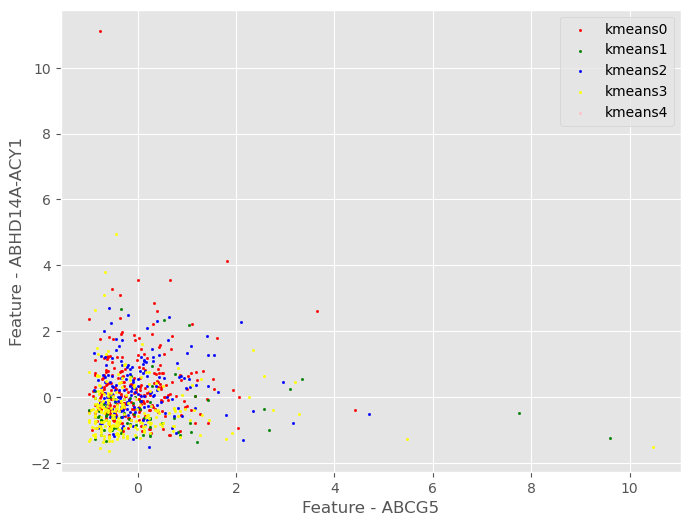

In [11]:
# Let's try to visualize the clusters from different planes
def plot_clusters(gene_data, y, feat_idx_1, feat_idx_2, labels):

    feature_names = gene_data.columns
    label_colors = ['red', 'green', 'blue', 'yellow', 'pink']

    # Plot by labels
    for i, label in enumerate(labels):
        plt.scatter(gene_data.iloc[:,feat_idx_1][labels_assigned==i], 
                    gene_data.iloc[:,feat_idx_2][labels_assigned==i],
                    marker = '.', c = label_colors[i], s=10)
    
    plt.xlabel("Feature - " + feature_names[feat_idx_1])
    plt.ylabel("Feature - " + feature_names[feat_idx_2])
    plt.legend(labels)

plot_clusters(X_train, clusters, 90, 100, labels)

### DBSCAN 

DBSCAN is a density-based clustering non-parametric algorithm. Given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away - noise points). 

DBSCAN requires two parameters: **ε (eps)** and the **minimum number of points** required to form a dense region. It starts with an arbitrary starting point that has not been visited. This point's ε-neighborhood is retrieved, and if it contains sufficiently many points, a cluster is started. Otherwise, the point is labeled as noise. Note that this point might later be found in a sufficiently sized ε-environment of a different point and hence be made part of a cluster.

If a point is found to be a dense part of a cluster, its ε-neighborhood is also part of that cluster. Hence, all points that are found within the ε-neighborhood are added, as is their own ε-neighborhood when they are also dense. This process continues until the density-connected cluster is completely found. Then, a new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise.

DBSCAN can be used with any distance function!

In [12]:
dbscan = DBSCAN(eps=0.001,min_samples=100)
dbscan.fit(X_train_scaled)
db_labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 0
Estimated number of noise points: 737


### Agglomerative Clustering

In [13]:
import numpy as np

agg_cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
agg_cluster.fit(X_train_scaled)
labels = np.unique(agg_cluster.labels_)

# Number of clusters in labels, ignoring noise if present.
n_per_cluster = [list(agg_cluster.labels_).count(i) for i in range(5)]

print("Number of labels per cluster: ", n_per_cluster)

Number of labels per cluster:  [294, 66, 4, 303, 70]


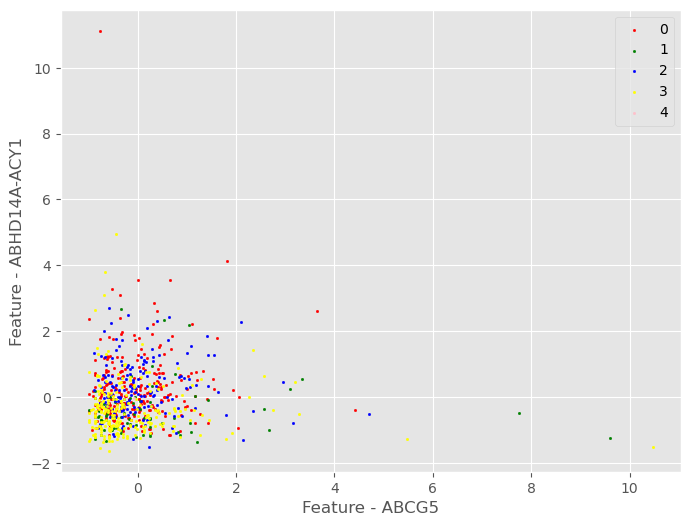

In [14]:
plot_clusters(X_train, labels_assigned, 90, 100, labels)

### Visualizing High Dimensional Clusters

* Principal Component Analysis (PCA)

    PCA is an algorithm that is used for dimensionality reduction - meaning, informally, that it can take in a DataFrame with many columns and return a DataFrame with a reduced number of columns that still retains much of the information from the columns of the original DataFrame. The columns of the DataFrame produced from the PCA procedure are called Principal Components. We will use these principal components to help us visualize our clusters in 1-D, 2-D, and 3-D space, since we cannot easily visualize the data we have in higher dimensions. For example, we can use two principal components to visualize the clusters in 2-D space, or three principal components to visualize the clusters in 3-D space.
    
* T-Distributed Stochastic Neighbor Embedding (T-SNE)


In [15]:
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [16]:
# Let's try to visualize the clusters from different planes
def plot_pca(df_pca_2, labels, dim=2):

    label_colors = ['red', 'green', 'blue', 'yellow', 'pink']

    if dim==2:
        for i, label in enumerate(labels):
            plt.scatter(df_pca_2.iloc[:,0][labels_assigned==i], 
                        df_pca_2.iloc[:,1][labels_assigned==i],
                        marker = '.', c = label_colors[i], s=10)
        
        plt.xlabel("PCA component 1")
        plt.ylabel("PCA component 2")

    if dim==3:

        # Creating figure
        fig = plt.figure()
        ax = plt.axes(projection ="3d")

        for i, label in enumerate(labels):
            ax.scatter3D(df_pca_2.iloc[:,0][labels_assigned==i], 
                        df_pca_2.iloc[:,1][labels_assigned==i],
                        df_pca_2.iloc[:,2][labels_assigned==i],
                        marker = '.', c = label_colors[i])
        
        ax.set_xlabel("PCA component 1")
        ax.set_ylabel("PCA component 2")
        ax.set_zlabel("PCA component 2")

    plt.legend(labels)

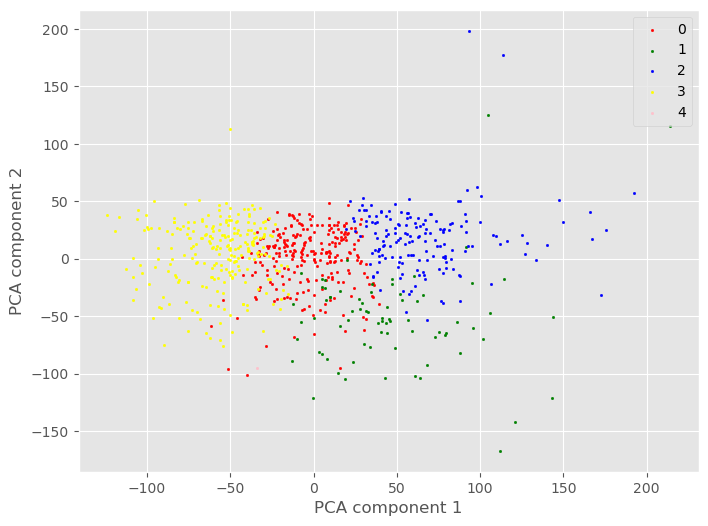

In [19]:
pca_2 = PCA(n_components=2)
df_pca_2 = pd.DataFrame(pca_2.fit_transform(X_train_scaled), columns=['PCA_1', 'PCA_2'])

plot_pca(df_pca_2, labels)

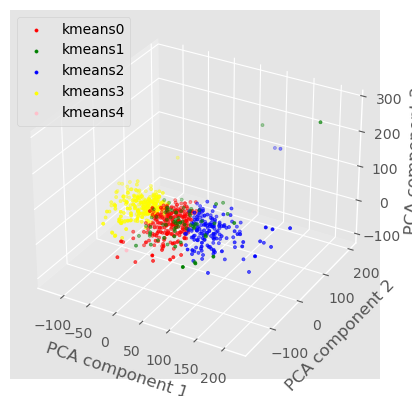

In [37]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(X_train_scaled), columns=['PCA_1', 'PCA_2', 'PCA_3'])

plot_pca(df_pca_3, labels, dim=3)

## Embeddings

Since it is really difficult to understand and intepret clusters in dimensional spaces when having more than 3 feature. For that reason, it would be useful to represent genes (in our case vectors) as vectors i.e. embeddings. Having these vectors we can also include the relationship with other genes. Firstly, we hypothesized that gene properties (samples in our case) are also distributional, such that *character of a gene can be defined by its companies* in term of gene expression, and embedding can be employed to infer the relationship between genes, therefore, relevant biological information could be retrieved from embedding space.